In [1]:
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing





#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)


#load data
df = pd.read_csv('Airline_Delay_Cause.csv')


#data renaming
df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df = df.fillna(df.mean())            #fill with null value
df.head()


,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


In [2]:

# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column
df['Number of flight arrive on time'] = df['Number of flight arriving at airport'] - df['Number of flight more than 15 minutes late']  - df['Number of flights cancelled']
df['Delayed'] = df['Total time of delayed flight'].apply(lambda x: 0 if x == 0 else 1)



# Display the updated DataFrame
df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Number of flight arrive on time,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,31.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,53.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,100.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,57.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,143.0,1


In [3]:
Delta_Air_Lines_Inc = df['carrier_name'] == 'Delta Air Lines Inc.'     #select only delta airline info in dataframe

df = df[Delta_Air_Lines_Inc]

df

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Number of flight arrive on time,Delayed
359,2022,7,DL,Delta Air Lines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",104.0,20.0,10.49,2.40,3.51,0.00,3.60,0.0,0.0,1158.0,655.0,188.0,112.0,0.0,203.0,84.0,1
360,2022,7,DL,Delta Air Lines Inc.,ALB,"Albany, NY: Albany International",90.0,23.0,15.01,0.72,1.98,0.00,5.28,1.0,0.0,1151.0,689.0,61.0,102.0,0.0,299.0,66.0,1
361,2022,7,DL,Delta Air Lines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",341.0,46.0,24.50,0.54,13.90,0.00,7.06,0.0,0.0,1799.0,1001.0,60.0,364.0,0.0,374.0,295.0,1
362,2022,7,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",18388.0,3479.0,1096.18,134.80,822.76,2.00,1423.26,171.0,50.0,259825.0,119425.0,9972.0,37919.0,85.0,92424.0,14738.0,1
363,2022,7,DL,Delta Air Lines Inc.,ATW,"Appleton, WI: Appleton International",36.0,6.0,3.00,0.00,0.23,0.00,2.77,0.0,1.0,255.0,125.0,0.0,16.0,0.0,114.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100658,2017,1,DL,Delta Air Lines Inc.,TUS,"Tucson, AZ: Tucson International",76.0,21.0,10.43,1.73,5.08,0.00,3.75,1.0,0.0,923.0,613.0,34.0,175.0,0.0,101.0,54.0,1
100659,2017,1,DL,Delta Air Lines Inc.,TVC,"Traverse City, MI: Cherry Capital",4.0,1.0,0.79,0.00,0.21,0.00,0.00,0.0,0.0,43.0,34.0,0.0,9.0,0.0,0.0,3.0,1
100660,2017,1,DL,Delta Air Lines Inc.,TYS,"Knoxville, TN: McGhee Tyson",76.0,12.0,7.51,1.30,1.38,0.00,1.80,4.0,0.0,690.0,240.0,106.0,38.0,0.0,306.0,60.0,1
100661,2017,1,DL,Delta Air Lines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",93.0,11.0,3.30,0.38,0.59,0.49,6.24,1.0,1.0,2266.0,968.0,30.0,35.0,54.0,1179.0,81.0,1


In [4]:
#select required column
df = df[['year', 'month', 'Number of flight arriving at airport', 'Number of flight arrive on time', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather', 'Total time of delayed flight', 'Total time of delayed flight due to weather', 'Delayed']]
df.head(1)


,year,month,Number of flight arriving at airport,Number of flight arrive on time,Number of flight more than 15 minutes late,Number of flights delayed due to weather,Total time of delayed flight,Total time of delayed flight due to weather,Delayed
359,2022,7,104.0,84.0,20.0,2.4,1158.0,188.0,1


In [5]:
weather_delay = df['Number of flights delayed due to weather']
delay = df['Number of flight more than 15 minutes late']

In [6]:
#calculate mean and standard deviation


mean_weather_delay = weather_delay.mean()
std_weather_delay = weather_delay.std()

print('Mean number of flights delayed due to weather:', mean_weather_delay)
print('Standard deviation of number of flights delayed due to weather:', std_weather_delay)


Mean number of flights delayed due to weather: 2.9145849942478486
Standard deviation of number of flights delayed due to weather: 9.147575302406732


In [7]:
number_of_flight = df['Number of flight arriving at airport']
total_delay = df['Number of flight more than 15 minutes late']


In [8]:
correlation = weather_delay.corr(total_delay).round(2)
print('Correlation between number of flights delayed due to weather and total number of delayed flights:', correlation)


Correlation between number of flights delayed due to weather and total number of delayed flights: 0.92


In [9]:
correlation_1 = weather_delay.corr(number_of_flight)
print('Correlation between number of flights delayed due to weather and total number of delayed flights:', correlation_1)


Correlation between number of flights delayed due to weather and total number of delayed flights: 0.8626952992135508


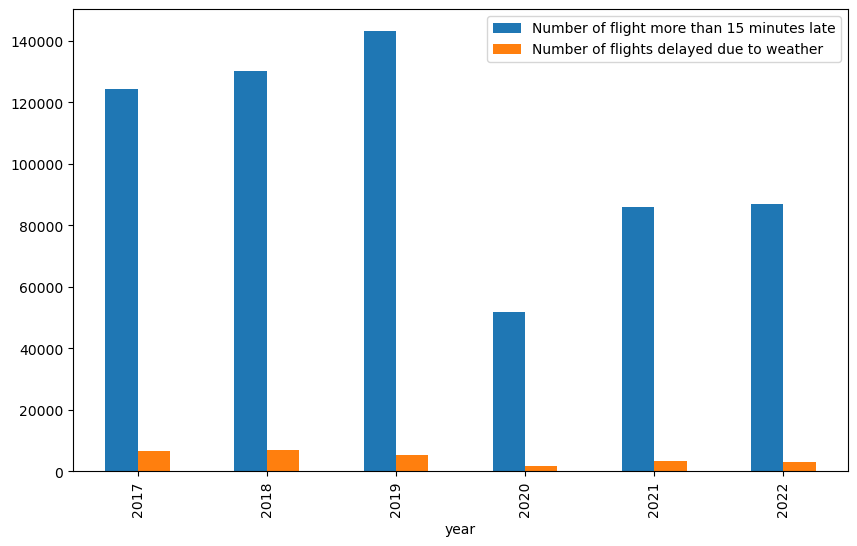

In [10]:
import matplotlib.pyplot as plt


df_sub = df[['year', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather']]
df_grouped = df_sub.groupby('year').sum()
df_grouped.plot(kind='bar', figsize=(10,6))


# Save the plot as a PNG file
plt.savefig('flights delayed for weather.png')

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00      1757

    accuracy                           1.00      1809
   macro avg       1.00      1.00      1.00      1809
weighted avg       1.00      1.00      1.00      1809



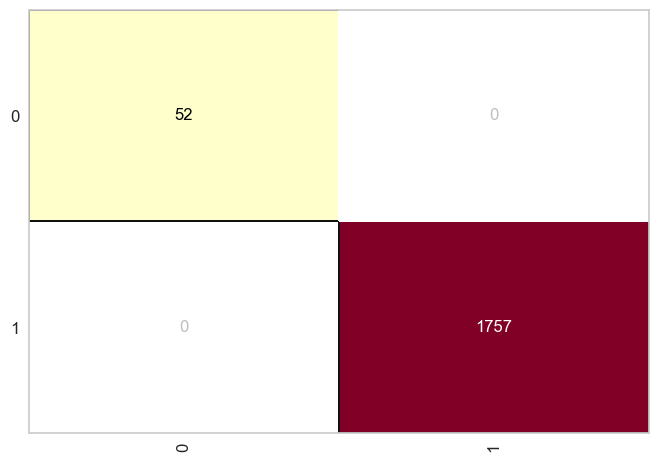

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix


X1 = df[['year', 'month', 'Number of flight arriving at airport','Number of flight arrive on time', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather', 'Total time of delayed flight due to weather', 'Total time of delayed flight']]
y1 = df['Delayed']


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

#using RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
print('Accuracy:', accuracy)

cm = ConfusionMatrix(model1)
cm.fit(X_train1, y_train1)
cm.score(X_test1, y_test1)


classification_1 = (classification_report(y_test1, y_pred1))
print(classification_1)





In [12]:
#Split the data into input features and target variable. In this case, the input features are the other columns except for the "Number of flights delayed due to weather" column, and the target variable is the "Number of flights delayed due to weather" column.
from sklearn.feature_selection import RFE
X = df.drop(['Number of flights delayed due to weather'], axis=1)
y = df['Number of flights delayed due to weather']


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest Regressor model
model = RandomForestRegressor()

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 8.537881436435026


In [13]:
y_pred

array([1.258 , 0.8266, 0.    , ..., 0.2123, 2.7314, 2.2425])

In [14]:
#evalute
new_data = pd.DataFrame({
    "year": [2024],
    "month": [6],
    "Number of flight arriving at airport": [500],
    "Number of flight arrive on time": [200],
    "Number of flight more than 15 minutes late": [100],
    "Total time of delayed flight": [1000],
    "Total time of delayed flight due to weather": [2],
    "Delayed": [0],
})


prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0.0893]


In [15]:
new_data = pd.DataFrame({
    "year": [2020],
    "month": [11],
    "Number of flight arriving at airport": [500],
    "Number of flight arrive on time": [20],
    "Number of flight more than 15 minutes late": [100],
    "Total time of delayed flight": [1000],
    "Total time of delayed flight due to weather": [2],
    "Delayed": [1],
})


prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0.0838]


In [16]:
data = df.to_dict(orient = "records") #converting data into dictionary for conncet with mongodb
db = client.Delta_Air_Lines_Inc
db.Delta_Air_Lines_Inc.insert_many(data)